In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('data-final.csv', sep='\t', error_bad_lines=False)
data = data.copy()
pd.options.display.max_columns = 150

data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)

print('Number of participants: ', len(data))
data.head()

Number of participants:  2553


<ipython-input-3-7f4562829f35>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('data-final.csv', sep='\t', error_bad_lines=False)


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4,1,5,2,5,1,5,2,4,1,1,4,4,2,2,2,2,2,3,2,2,5,2,4,2,3,2,4,3,4,3,4,3,2,2,4,4,2,4,4,5,1,4,1,4,1,5,3,4,5,GB
1,3,5,3,4,3,3,2,5,1,5,2,3,4,1,3,1,2,1,3,1,1,4,1,5,1,5,3,4,5,3,3,2,5,3,3,1,3,3,5,3,1,2,4,2,3,1,4,2,5,3,MY
2,2,3,4,4,3,2,1,3,2,5,4,4,4,2,2,2,2,2,1,3,1,4,1,4,2,4,1,4,4,3,4,2,2,2,3,3,4,2,4,2,5,1,2,1,4,2,5,3,4,4,GB
3,2,2,2,3,4,2,2,4,1,4,3,3,3,2,3,2,2,2,4,3,2,4,3,4,2,4,2,4,3,4,2,4,4,4,1,2,2,3,1,4,4,2,5,2,3,1,4,4,3,3,GB
4,3,3,3,3,5,3,3,5,3,4,1,5,5,3,1,1,1,1,3,2,1,5,1,5,1,3,1,5,5,3,5,1,5,1,3,1,5,1,5,5,5,1,5,1,5,1,5,3,5,5,KE


In [ ]:
print('Is there any missing value? ', data.isnull().values.any())
print('How many missing values? ', data.isnull().values.sum())
data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))

Is there any missing value?  True
How many missing values?  3
Number of participants after eliminating missing values:  2550


In [ ]:
# Groups and Questions
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                                  'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

In [ ]:
EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]

In [ ]:
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

Q&As Related to Extroversion Personality


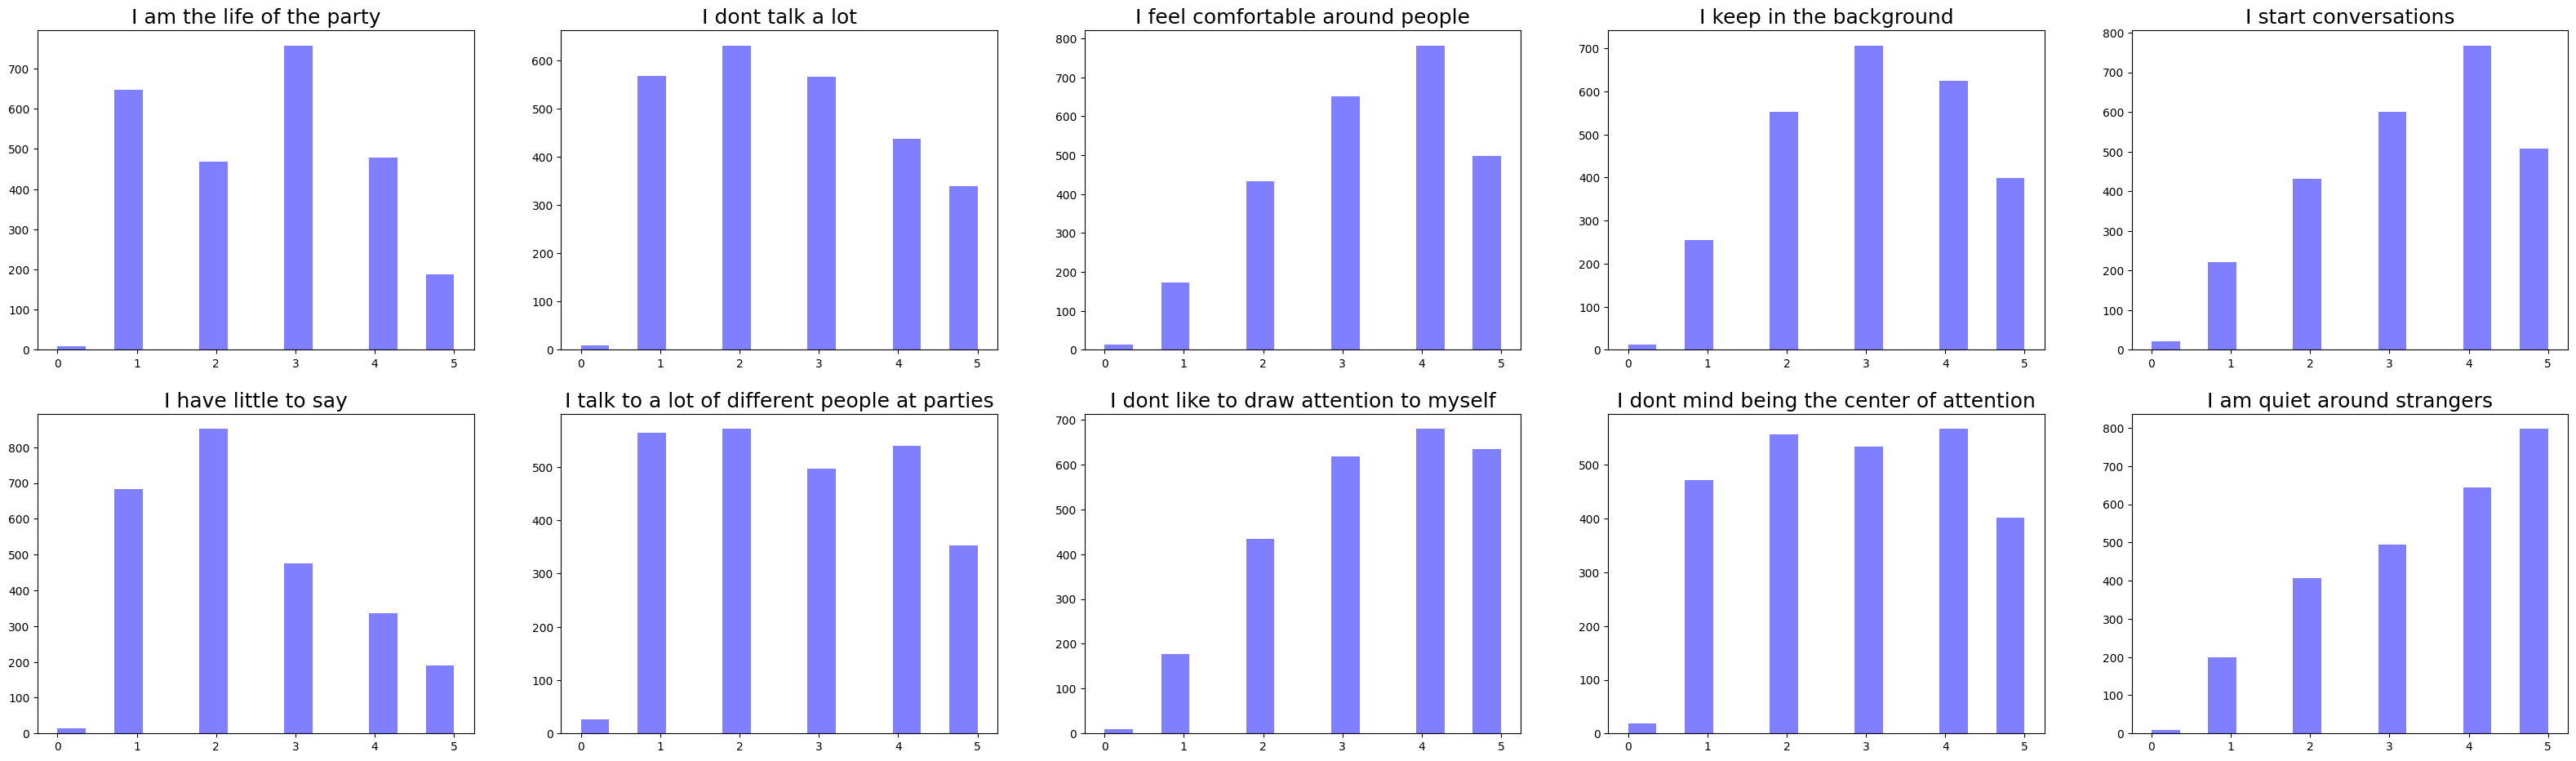

In [ ]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, 'blue')

Q&As Related to Neuroticism Personality


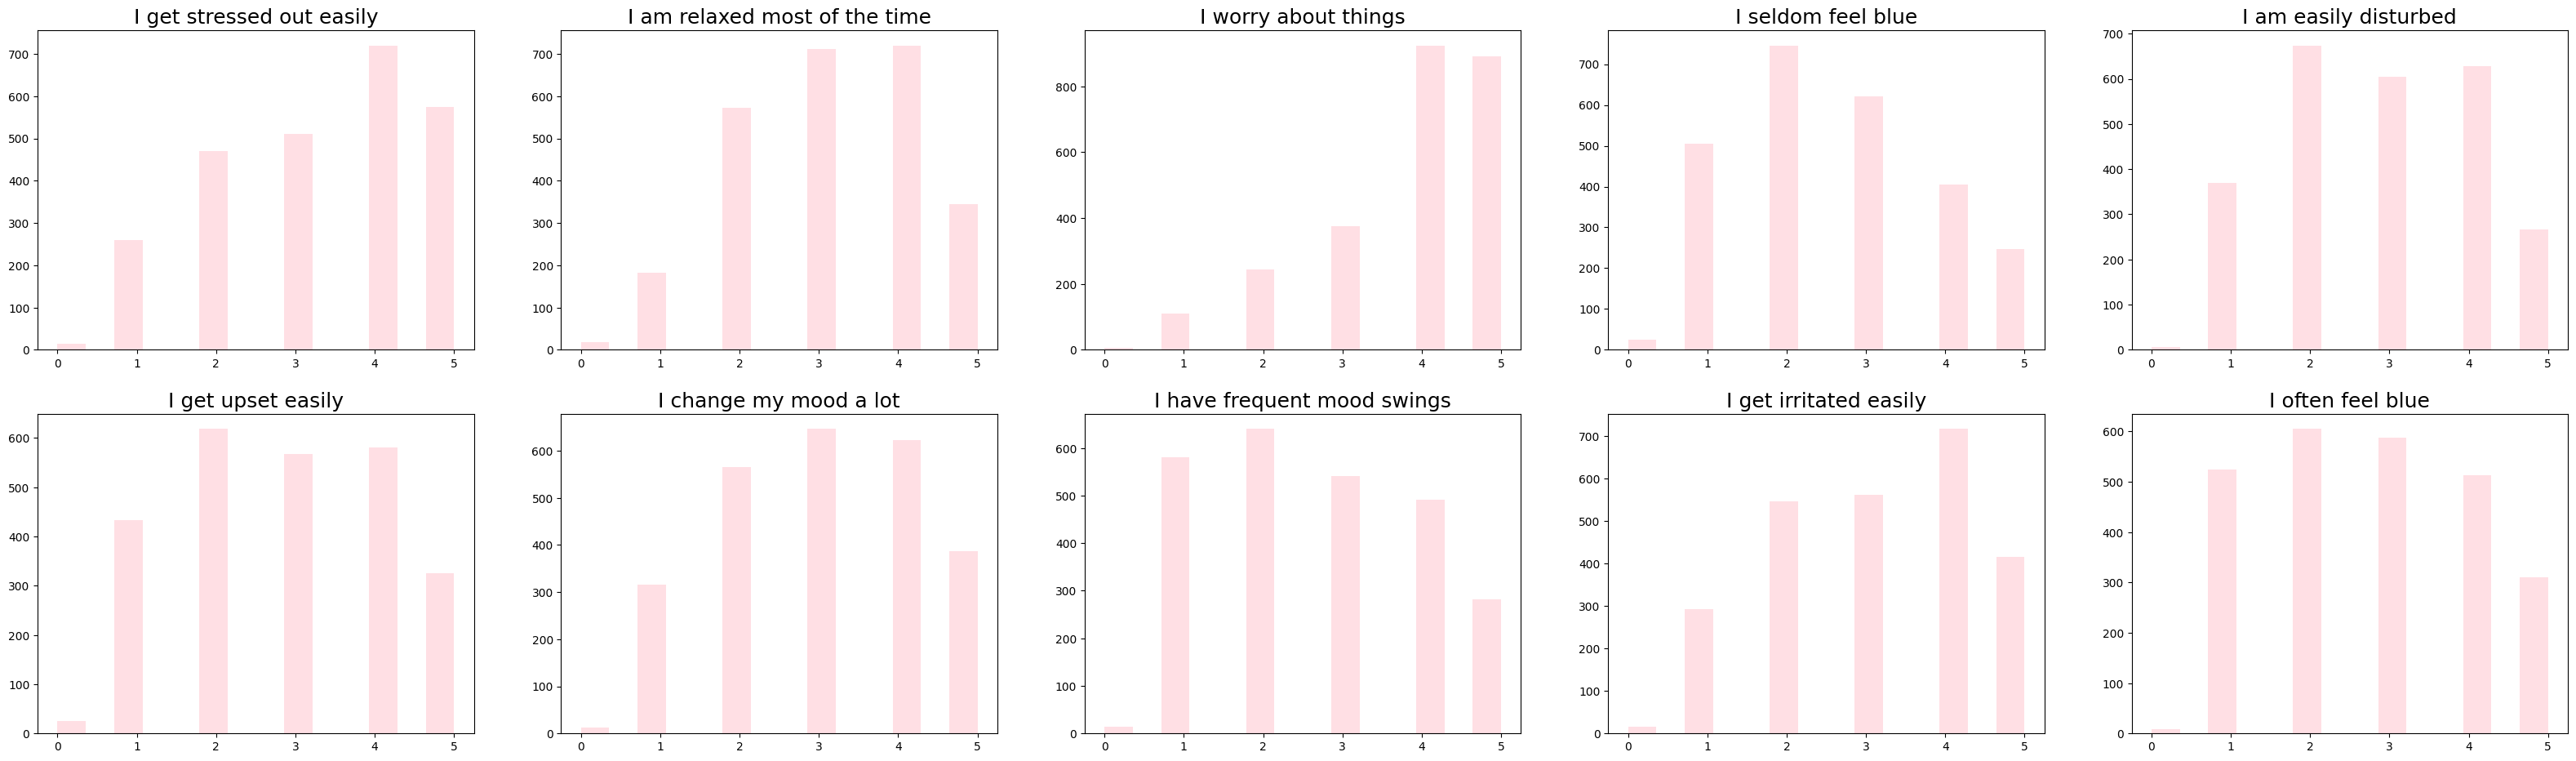

In [ ]:
print('Q&As Related to Neuroticism Personality')
vis_questions(EST, est_questions, 'pink')

Q&As Related to Agreeable Personality


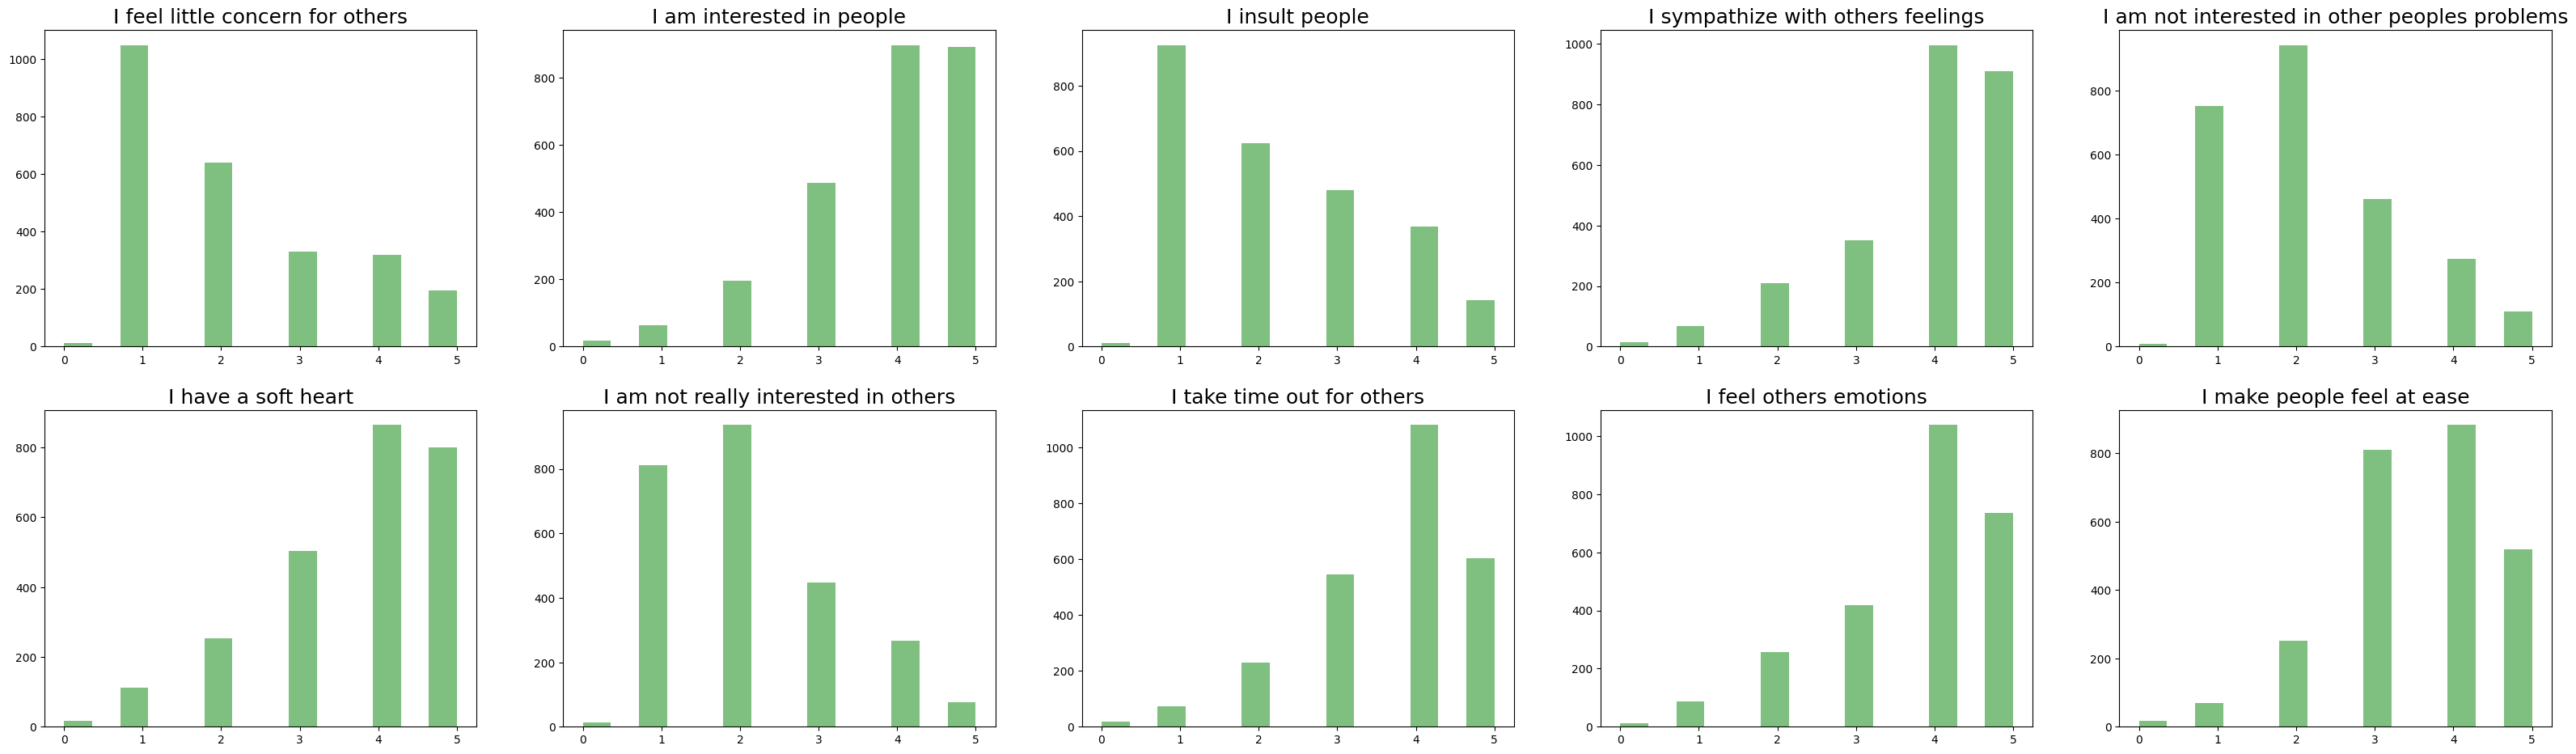

In [ ]:
print('Q&As Related to Agreeable Personality')
vis_questions(AGR, agr_questions, 'green')

Q&As Related to Conscientious Personality


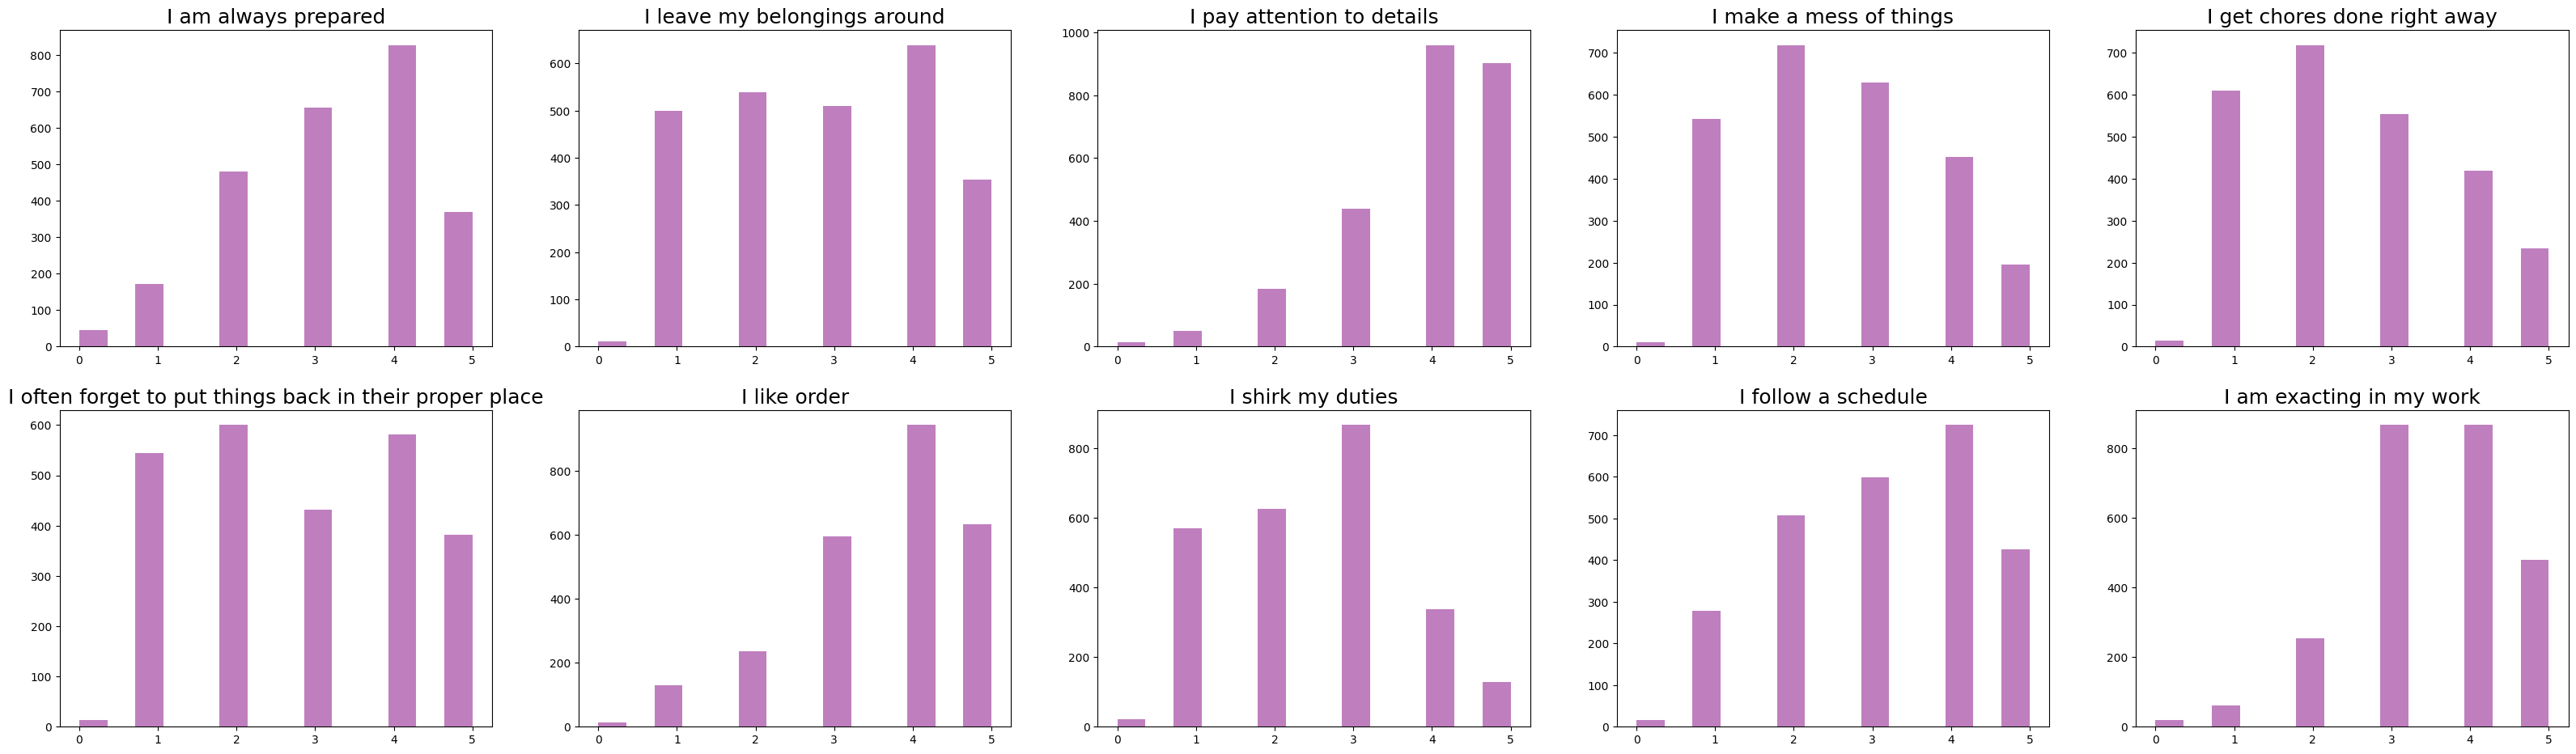

In [ ]:
print('Q&As Related to Conscientious Personality')
vis_questions(CSN, csn_questions, 'purple')

Q&As Related to Open Personality


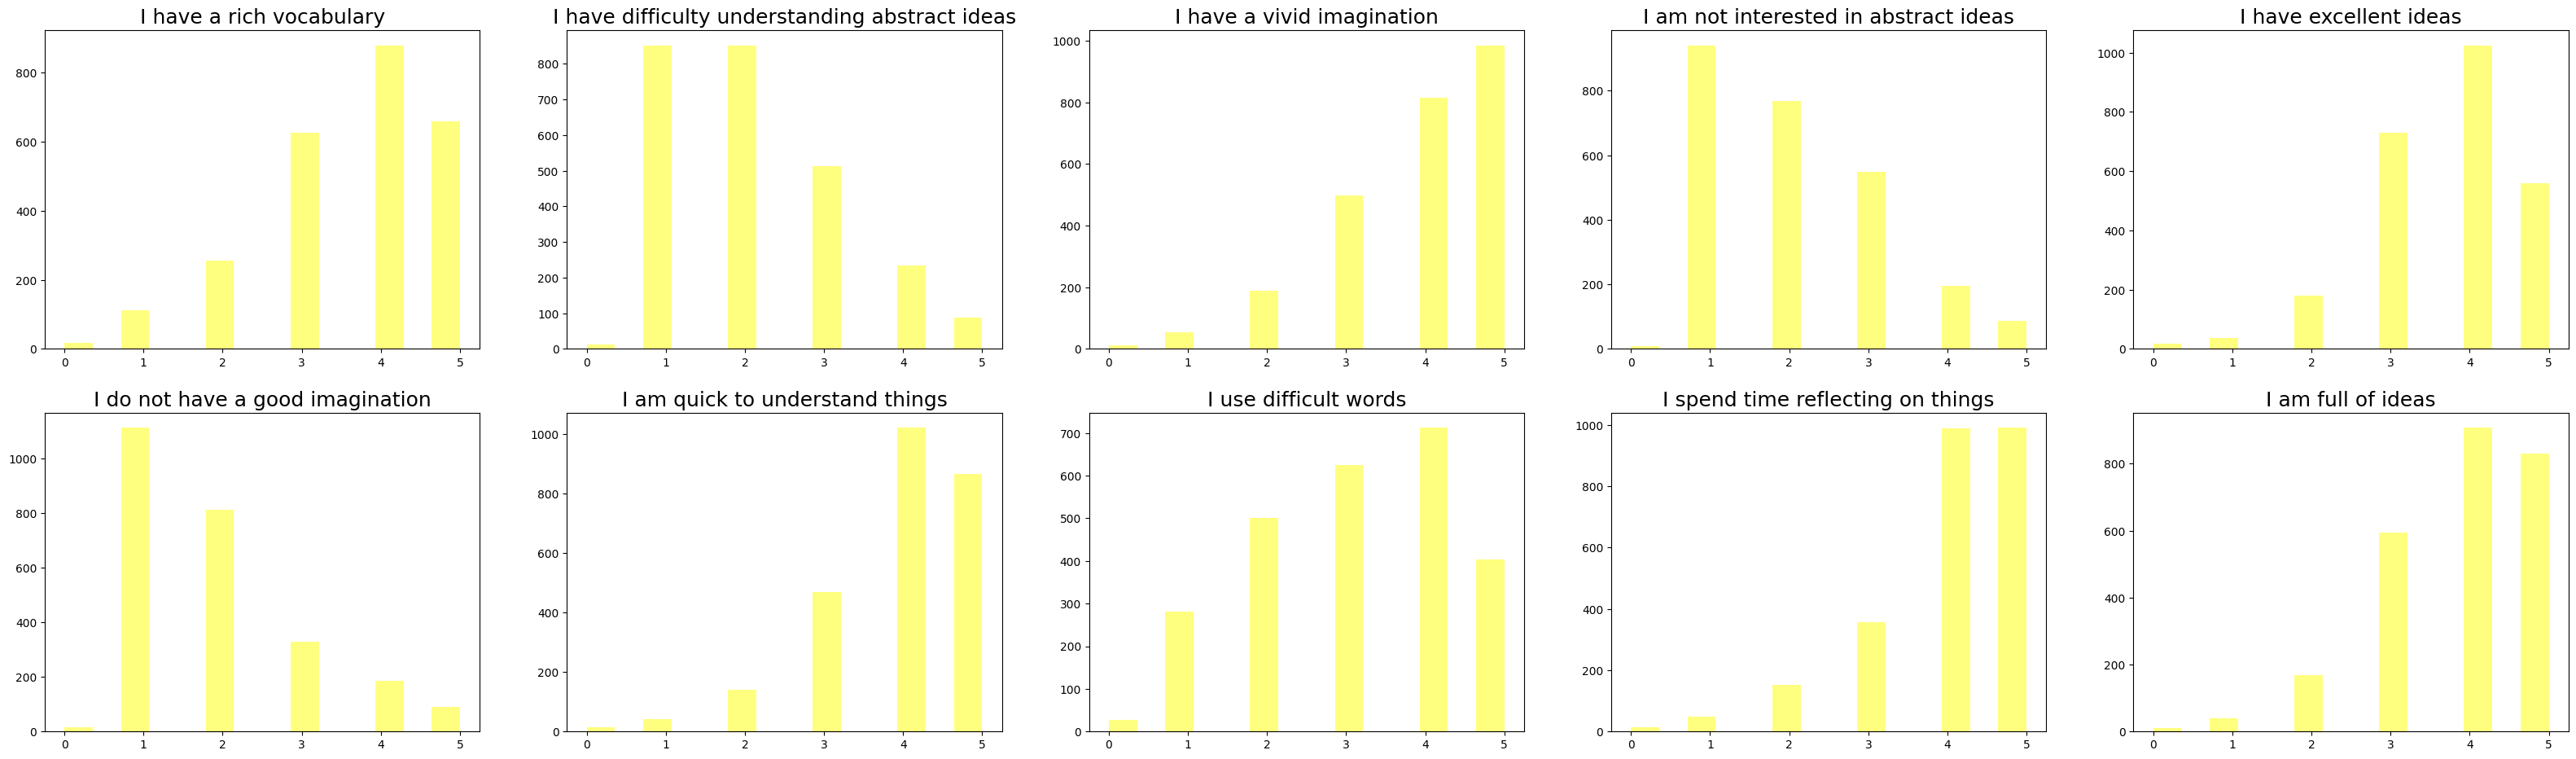

In [ ]:
print('Q&As Related to Open Personality')
vis_questions(OPN, opn_questions, 'yellow')

In [ ]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000
from sklearn.preprocessing import MinMaxScaler

df = data.drop('country', axis=1)
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_model = df[:5000]

In [ ]:
!pip install xlsxwriter


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 2.9 MB/s eta 0:00:00


In [ ]:
writer = pd.ExcelWriter('output1.xlsx', engine='xlsxwriter')
df_model.to_excel(writer, sheet_name='report data', index=False)
writer.close()

df_model

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,0.8,0.2,1.0,0.4,1.0,0.2,1.0,0.4,0.8,0.2,0.2,0.8,0.8,0.4,0.4,0.4,0.4,0.4,0.6,0.4,0.4,1.0,0.4,0.8,0.4,0.6,0.4,0.8,0.6,0.8,0.6,0.8,0.6,0.4,0.4,0.8,0.8,0.4,0.8,0.8,1.0,0.2,0.8,0.2,0.8,0.2,1.0,0.6,0.8,1.0
1,0.6,1.0,0.6,0.8,0.6,0.6,0.4,1.0,0.2,1.0,0.4,0.6,0.8,0.2,0.6,0.2,0.4,0.2,0.6,0.2,0.2,0.8,0.2,1.0,0.2,1.0,0.6,0.8,1.0,0.6,0.6,0.4,1.0,0.6,0.6,0.2,0.6,0.6,1.0,0.6,0.2,0.4,0.8,0.4,0.6,0.2,0.8,0.4,1.0,0.6
2,0.4,0.6,0.8,0.8,0.6,0.4,0.2,0.6,0.4,1.0,0.8,0.8,0.8,0.4,0.4,0.4,0.4,0.4,0.2,0.6,0.2,0.8,0.2,0.8,0.4,0.8,0.2,0.8,0.8,0.6,0.8,0.4,0.4,0.4,0.6,0.6,0.8,0.4,0.8,0.4,1.0,0.2,0.4,0.2,0.8,0.4,1.0,0.6,0.8,0.8
3,0.4,0.4,0.4,0.6,0.8,0.4,0.4,0.8,0.2,0.8,0.6,0.6,0.6,0.4,0.6,0.4,0.4,0.4,0.8,0.6,0.4,0.8,0.6,0.8,0.4,0.8,0.4,0.8,0.6,0.8,0.4,0.8,0.8,0.8,0.2,0.4,0.4,0.6,0.2,0.8,0.8,0.4,1.0,0.4,0.6,0.2,0.8,0.8,0.6,0.6
4,0.6,0.6,0.6,0.6,1.0,0.6,0.6,1.0,0.6,0.8,0.2,1.0,1.0,0.6,0.2,0.2,0.2,0.2,0.6,0.4,0.2,1.0,0.2,1.0,0.2,0.6,0.2,1.0,1.0,0.6,1.0,0.2,1.0,0.2,0.6,0.2,1.0,0.2,1.0,1.0,1.0,0.2,1.0,0.2,1.0,0.2,1.0,0.6,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,0.6,0.2,0.6,0.6,0.8,0.4,0.6,0.6,0.6,0.8,0.8,0.4,0.8,0.6,0.8,0.8,0.8,0.8,0.4,0.6,0.6,0.6,0.2,0.6,0.6,0.8,0.6,0.6,0.4,0.8,0.4,0.8,0.4,0.6,0.2,0.8,0.8,0.4,0.8,0.6,1.0,0.8,0.8,0.6,0.8,0.4,0.4,0.8,0.8,0.8
2546,0.8,0.4,0.8,0.4,0.8,0.4,0.8,0.6,0.8,0.6,0.6,0.6,0.8,0.6,0.6,0.6,0.8,0.8,0.8,0.4,0.4,0.8,0.8,0.8,0.6,0.6,0.6,0.6,0.8,0.6,0.8,0.8,0.8,0.6,0.6,0.4,0.8,0.6,0.8,0.6,0.8,0.4,0.8,0.4,0.8,0.4,0.8,0.8,0.8,0.8
2547,0.6,0.4,1.0,0.8,0.4,0.4,0.6,0.4,1.0,0.6,0.8,0.8,0.2,0.4,0.4,0.4,0.4,0.4,0.8,0.2,0.4,0.8,0.6,0.8,0.6,0.4,0.4,0.6,0.6,0.4,0.8,0.8,1.0,0.4,0.2,0.4,0.8,0.4,0.4,1.0,1.0,0.2,0.4,0.6,0.8,0.8,1.0,1.0,0.8,0.8
2548,0.4,1.0,0.4,1.0,0.2,0.2,0.2,1.0,0.2,1.0,0.6,0.4,0.8,0.2,0.4,0.2,0.2,0.2,1.0,0.6,0.2,0.6,0.2,1.0,0.2,1.0,0.2,1.0,0.8,0.4,0.6,0.2,0.8,0.2,0.4,0.4,1.0,0.2,1.0,1.0,0.8,0.8,0.4,0.4,1.0,0.2,0.8,0.6,1.0,1.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

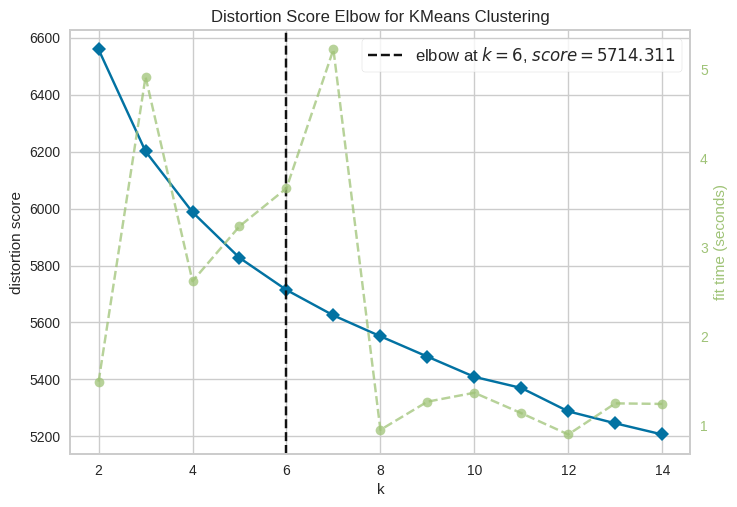

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Visualize the elbow
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_model)
visualizer.poof()

In [ ]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = kmeans.labels_
df_model['Clusters'] = predictions
df_model.head()

<ipython-input-17-f6fe3f88c407>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Clusters'] = predictions


,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,0.8,0.2,1.0,0.4,1.0,...,1.0,0.6,0.8,1.0,5
1,0.6,1.0,0.6,0.8,0.6,...,0.8,0.4,1.0,0.6,1
2,0.4,0.6,0.8,0.8,0.6,...,1.0,0.6,0.8,0.8,1
3,0.4,0.4,0.4,0.6,0.8,...,0.8,0.8,0.6,0.6,8
4,0.6,0.6,0.6,0.6,1.0,...,1.0,0.6,1.0,1.0,1


In [ ]:
#Analysing the Model and Predictions
df_model.Clusters.value_counts()

6     265
1     246
10    222
13    215
3     210
0     206
5     193
4     190
8     183
11    171
12    170
7     137
9     135
2       7
Name: Clusters, dtype: int64

In [ ]:
#Let's group the results acording to clusters. That way we can investigate the average answer to the each question for each cluster.
pd.options.display.max_columns = 150
df_model.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.605825,0.513592,0.692233,0.549515,0.657282,0.512621,0.577670,0.632039,0.605825,0.708738,0.640777,0.652427,0.722330,0.560194,0.597087,0.572816,0.637864,0.545631,0.638835,0.517476,0.569903,0.710680,0.515534,0.653398,0.531068,0.666019,0.492233,0.662136,0.636893,0.654369,0.577670,0.586408,0.645631,0.567961,0.455340,0.602913,0.662136,0.574757,0.560194,0.611650,0.564078,0.573786,0.653398,0.554369,0.650485,0.519417,0.653398,0.497087,0.670874,0.644660
1,0.447154,0.641463,0.728455,0.669106,0.669106,0.471545,0.535772,0.782927,0.454472,0.756911,0.505691,0.749593,0.682114,0.623577,0.458537,0.379675,0.389431,0.305691,0.406504,0.356098,0.341463,0.819512,0.280488,0.851220,0.383740,0.805691,0.363415,0.810569,0.799187,0.776423,0.781301,0.380488,0.884553,0.328455,0.695122,0.355285,0.834146,0.360976,0.783740,0.776423,0.717073,0.430081,0.751220,0.420325,0.747967,0.376423,0.841463,0.525203,0.810569,0.756911
2,0.200000,0.371429,0.257143,0.142857,0.314286,0.200000,0.000000,0.114286,0.000000,0.000000,0.257143,0.428571,0.257143,0.142857,0.257143,0.057143,0.000000,0.000000,0.000000,0.000000,0.285714,0.457143,0.085714,0.257143,0.285714,0.200000,0.000000,0.000000,0.000000,0.000000,0.342857,0.114286,0.285714,0.057143,0.200000,0.142857,0.000000,0.000000,0.000000,0.000000,0.400000,0.142857,0.257143,0.285714,0.142857,0.057143,0.085714,0.000000,0.000000,0.000000
3,0.618095,0.416190,0.695238,0.560952,0.740000,0.358095,0.622857,0.619048,0.693333,0.660952,0.789524,0.546667,0.902857,0.387619,0.656190,0.727619,0.795238,0.760952,0.736190,0.728571,0.321905,0.874286,0.497143,0.886667,0.340000,0.824762,0.335238,0.789524,0.868571,0.750476,0.517143,0.799048,0.791429,0.699048,0.322857,0.781905,0.636190,0.597143,0.480952,0.691429,0.880952,0.338095,0.914286,0.299048,0.803810,0.276190,0.851429,0.822857,0.904762,0.887619
4,0.666316,0.398947,0.770526,0.527368,0.837895,0.427368,0.713684,0.593684,0.726316,0.642105,0.858947,0.562105,0.905263,0.470526,0.734737,0.802105,0.838947,0.785263,0.841053,0.696842,0.551579,0.846316,0.563158,0.818947,0.449474,0.827368,0.414737,0.771579,0.815789,0.782105,0.703158,0.577895,0.831579,0.589474,0.654737,0.572632,0.821053,0.535789,0.763158,0.742105,0.637895,0.540000,0.800000,0.528421,0.754737,0.420000,0.754737,0.588421,0.822105,0.800000
5,0.716062,0.334715,0.923316,0.408290,0.905699,0.280829,0.825907,0.526425,0.810363,0.446632,0.365803,0.812435,0.501554,0.720207,0.375130,0.306736,0.343005,0.264249,0.355440,0.273575,0.356477,0.932642,0.354404,0.865285,0.328497,0.803109,0.297409,0.852850,0.844560,0.894301,0.704663,0.570984,0.815544,0.366839,0.584456,0.524352,0.733679,0.400000,0.677720,0.738860,0.820725,0.316062,0.844560,0.349223,0.849741,0.315026,0.891192,0.672539,0.803109,0.890155
6,0.704906,0.334340,0.852830,0.455094,0.864151,0.332830,0.780377,0.602264,0.718491,0.523774,0.707925,0.612830,0.824906,0.534340,0.532075,0.542642,0.562264,0.453585,0.588679,0.444528,0.323019,0.900377,0.363774,0.900377,0.330566,0.827170,0.288302,0.852075,0.867170,0.816604,0.786415,0.485283,0.846038,0.385660,0.649811,0.427925,0.828679,0.390943,0.780377,0.779623,0.742642,0.412830,0.803019,0.406792,0.790189,0.348679,0.800000,0.628679,0.805283,0.807547
7,0.382482,0.729927,0.430657,0.789781,0.456934,0.640876,0.340146,0.781022,0.481752,0.900730,0.791241,0.508029,0.835036,0.413139,0.652555,0.709489,0.786861,0.708029,0.833577,0.759124,0.681752,0.491971,0.724088,0.496350,0.735766,0.540146,0.713869,0.525547,0.525547,0.538686,0.605839,0.578102,0.766423,0.611679,0.418978,0.640876,0.722628,0.614599,0.597080,0.712409,0.805839,0.416058,0.827737,0.421898,0.760584,0.408759,0.817518,0.741606,0.817518,0.800000
8,0.381421,0.726776,0.569399,0.791257,0.483060,0.612022,0.400000,0.80

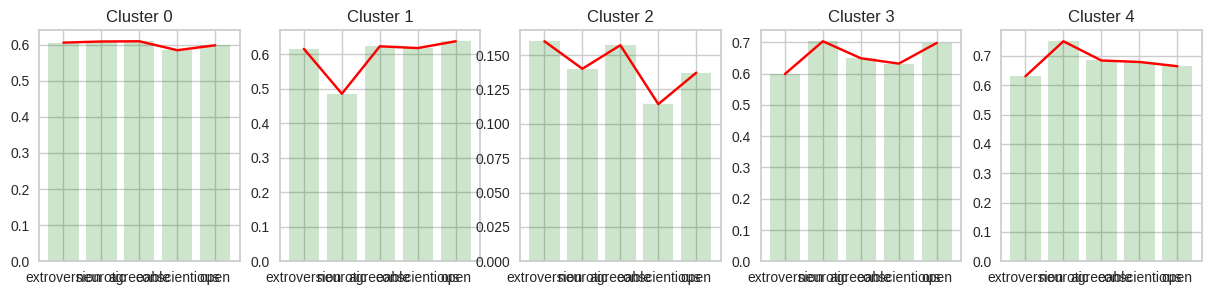

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
col_list = list(df_model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model[ext].sum(axis=1)/10
data_sums['neurotic'] = df_model[est].sum(axis=1)/10
data_sums['agreeable'] = df_model[agr].sum(axis=1)/10
data_sums['conscientious'] = df_model[csn].sum(axis=1)/10
data_sums['open'] = df_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()



# Visualizing the means for each cluster
dataclusters = data_sums.groupby('clusters').mean()
# Transpose the DataFrame to ensure proper alignment
transposed_data = dataclusters.transpose()

plt.figure(figsize=(15, 3))

for i in range(5):
    plt.subplot(1, 5, i + 1)

    plt.bar(transposed_data.index, transposed_data[i], color='green', alpha=0.2)
    plt.plot(transposed_data.index, transposed_data[i], color='red')

    plt.title('Cluster ' + str(i))

plt.show()


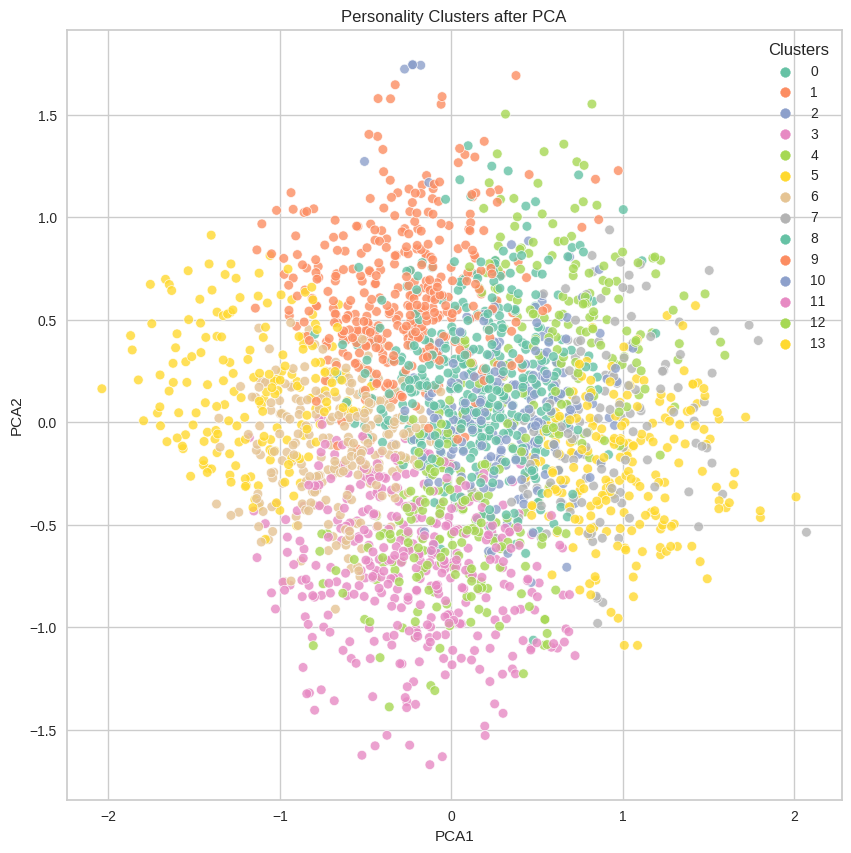

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model.drop('Clusters', axis=1))  # Exclude the 'Clusters' column if it exists

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA')
plt.show()


In [ ]:
my_data = pd.read_excel('/content/output1.xlsx')
my_data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,0.8,0.2,1.0,0.4,1.0,0.2,1.0,0.4,0.8,0.2,0.2,0.8,0.8,0.4,0.4,0.4,0.4,0.4,0.6,0.4,0.4,1.0,0.4,0.8,0.4,0.6,0.4,0.8,0.6,0.8,0.6,0.8,0.6,0.4,0.4,0.8,0.8,0.4,0.8,0.8,1.0,0.2,0.8,0.2,0.8,0.2,1.0,0.6,0.8,1.0
1,0.6,1.0,0.6,0.8,0.6,0.6,0.4,1.0,0.2,1.0,0.4,0.6,0.8,0.2,0.6,0.2,0.4,0.2,0.6,0.2,0.2,0.8,0.2,1.0,0.2,1.0,0.6,0.8,1.0,0.6,0.6,0.4,1.0,0.6,0.6,0.2,0.6,0.6,1.0,0.6,0.2,0.4,0.8,0.4,0.6,0.2,0.8,0.4,1.0,0.6
2,0.4,0.6,0.8,0.8,0.6,0.4,0.2,0.6,0.4,1.0,0.8,0.8,0.8,0.4,0.4,0.4,0.4,0.4,0.2,0.6,0.2,0.8,0.2,0.8,0.4,0.8,0.2,0.8,0.8,0.6,0.8,0.4,0.4,0.4,0.6,0.6,0.8,0.4,0.8,0.4,1.0,0.2,0.4,0.2,0.8,0.4,1.0,0.6,0.8,0.8
3,0.4,0.4,0.4,0.6,0.8,0.4,0.4,0.8,0.2,0.8,0.6,0.6,0.6,0.4,0.6,0.4,0.4,0.4,0.8,0.6,0.4,0.8,0.6,0.8,0.4,0.8,0.4,0.8,0.6,0.8,0.4,0.8,0.8,0.8,0.2,0.4,0.4,0.6,0.2,0.8,0.8,0.4,1.0,0.4,0.6,0.2,0.8,0.8,0.6,0.6
4,0.6,0.6,0.6,0.6,1.0,0.6,0.6,1.0,0.6,0.8,0.2,1.0,1.0,0.6,0.2,0.2,0.2,0.2,0.6,0.4,0.2,1.0,0.2,1.0,0.2,0.6,0.2,1.0,1.0,0.6,1.0,0.2,1.0,0.2,0.6,0.2,1.0,0.2,1.0,1.0,1.0,0.2,1.0,0.2,1.0,0.2,1.0,0.6,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,0.6,0.2,0.6,0.6,0.8,0.4,0.6,0.6,0.6,0.8,0.8,0.4,0.8,0.6,0.8,0.8,0.8,0.8,0.4,0.6,0.6,0.6,0.2,0.6,0.6,0.8,0.6,0.6,0.4,0.8,0.4,0.8,0.4,0.6,0.2,0.8,0.8,0.4,0.8,0.6,1.0,0.8,0.8,0.6,0.8,0.4,0.4,0.8,0.8,0.8
2546,0.8,0.4,0.8,0.4,0.8,0.4,0.8,0.6,0.8,0.6,0.6,0.6,0.8,0.6,0.6,0.6,0.8,0.8,0.8,0.4,0.4,0.8,0.8,0.8,0.6,0.6,0.6,0.6,0.8,0.6,0.8,0.8,0.8,0.6,0.6,0.4,0.8,0.6,0.8,0.6,0.8,0.4,0.8,0.4,0.8,0.4,0.8,0.8,0.8,0.8
2547,0.6,0.4,1.0,0.8,0.4,0.4,0.6,0.4,1.0,0.6,0.8,0.8,0.2,0.4,0.4,0.4,0.4,0.4,0.8,0.2,0.4,0.8,0.6,0.8,0.6,0.4,0.4,0.6,0.6,0.4,0.8,0.8,1.0,0.4,0.2,0.4,0.8,0.4,0.4,1.0,1.0,0.2,0.4,0.6,0.8,0.8,1.0,1.0,0.8,0.8
2548,0.4,1.0,0.4,1.0,0.2,0.2,0.2,1.0,0.2,1.0,0.6,0.4,0.8,0.2,0.4,0.2,0.2,0.2,1.0,0.6,0.2,0.6,0.2,1.0,0.2,1.0,0.2,1.0,0.8,0.4,0.6,0.2,0.8,0.2,0.4,0.4,1.0,0.2,1.0,1.0,0.8,0.8,0.4,0.4,1.0,0.2,0.8,0.6,1.0,1.0


In [ ]:
# Assuming you have a fitted KMeans model named kmeans
# Assuming my_data is the data point you want to predict the cluster for

# Use reshape(-1, 1) if my_data is a single sample
my_personality = kmeans.predict(my_data)

print('My Personality Cluster:', my_personality[0])


My Personality Cluster: 5


In [ ]:
# Summing up the my question groups
col_list = list(my_data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

my_sums = pd.DataFrame()
my_sums['extroversion'] = my_data[ext].sum(axis=1)/10
my_sums['neurotic'] = my_data[est].sum(axis=1)/10
my_sums['agreeable'] = my_data[agr].sum(axis=1)/10
my_sums['conscientious'] = my_data[csn].sum(axis=1)/10
my_sums['open'] = my_data[opn].sum(axis=1)/10
my_sums['cluster'] = my_personality
print('Sum of my question groups')
my_sums

Sum of my question groups


,extroversion,neurotic,agreeable,conscientious,open,cluster
0,0.60,0.48,0.62,0.64,0.66,5
1,0.68,0.42,0.64,0.62,0.54,1
2,0.58,0.52,0.56,0.56,0.62,1
3,0.52,0.54,0.64,0.54,0.62,8
4,0.70,0.46,0.60,0.64,0.72,1
...,...,...,...,...,...,...
2545,0.58,0.68,0.58,0.58,0.72,0
2546,0.64,0.66,0.66,0.68,0.68,4
2547,0.62,0.48,0.56,0.62,0.74,9
2548,0.56,0.46,0.56,0.58,0.70,10


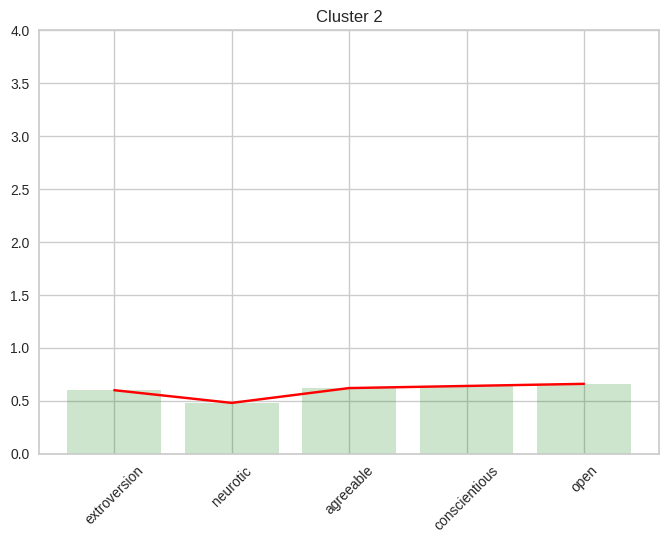

In [ ]:
my_sum = my_sums.drop('cluster', axis=1)
plt.bar(my_sum.columns, my_sum.iloc[0,:], color='green', alpha=0.2)
plt.plot(my_sum.columns, my_sum.iloc[0,:], color='red')
plt.title('Cluster 2')
plt.xticks(rotation=45)
plt.ylim(0,4);
